
-- ---------

**Name**: Jahid Hasan Rony

**ID**: 22204028
-- -------------------------
**Platform**: Kaggle 

**Dataset**: Yelp.com Review dataset (yelp_review) from huggingface. [LINK](https://huggingface.co/datasets/fancyzhx/yelp_polarity)

**Models Tested**:

    distilbert-base-uncased
    siebert/sentiment-roberta-large-english
    cardiffnlp/twitter-roberta-base-sentiment
    Ibrahim-Alam/finetuning-xlnet-base-cased-on-tweet_sentiment_binary
    nlptown/bert-base-multilingual-uncased-sentiment
    doitlazy/bert_binary_sentiment_analysis
    abilfad/sentiment-binary-dicoding
    roberta-base
    VictorSanh/roberta-base-finetuned-yelp-polarity 

**Optimizer** Tested: 

    Adam
    SGD

**Learning Rate**: 

    0.01
    5e-5
    1e-05
    Found 5e-5 good for Adam, 0.01 for SGD

    

In [1]:
# installing library

!pip install transformers
!pip install datasets
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you 

In [2]:
# I didn't have watermark library so installed it

!pip install watermark

In [3]:
# displayed the package versions and CUDA version, Helps a lot for offline  system setup and use GPU with sutable CUDA

%load_ext watermark
%watermark --conda -p torch,transformers,datasets,lightning

torch       : 2.5.1+cu124
transformers: 4.51.1
datasets    : 3.5.0
lightning   : 2.5.1

conda environment: n/a



## Sabestians default data loading technique, I **did not used** it as there are available datasets at huggingFace that does not require to unzip and that much pre-processing.


In [4]:
##### Sabestians deafult data loading technique,I did not used it as there are available datasets at huggingFace that does not require to unzip and that much processing.


# import os
# import sys
# import tarfile
# import time

# import numpy as np
# import pandas as pd
# from packaging import version
# from torch.utils.data import Dataset
# from tqdm import tqdm
# import urllib


# def reporthook(count, block_size, total_size):
#     global start_time
#     if count == 0:
#         start_time = time.time()
#         return
#     duration = time.time() - start_time
#     if duration == 0:
#         return
#     progress_size = int(count * block_size)
#     speed = progress_size / (1024.0**2 * duration)
#     percent = count * block_size * 100.0 / total_size

#     sys.stdout.write(
#         f"\r{int(percent)}% | {progress_size / (1024.**2):.2f} MB "
#         f"| {speed:.2f} MB/s | {duration:.2f} sec elapsed"
#     )
#     sys.stdout.flush()


# def download_dataset():
#     source = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
#     target = "aclImdb_v1.tar.gz"

#     if os.path.exists(target):
#         os.remove(target)

#     if not os.path.isdir("aclImdb") and not os.path.isfile("aclImdb_v1.tar.gz"):
#         urllib.request.urlretrieve(source, target, reporthook)

#     if not os.path.isdir("aclImdb"):

#         with tarfile.open(target, "r:gz") as tar:
#             tar.extractall()


# def load_dataset_into_to_dataframe():
#     basepath = "aclImdb"

#     labels = {"pos": 1, "neg": 0}

#     df = pd.DataFrame()

#     with tqdm(total=50000) as pbar:
#         for s in ("test", "train"):
#             for l in ("pos", "neg"):
#                 path = os.path.join(basepath, s, l)
#                 for file in sorted(os.listdir(path)):
#                     with open(os.path.join(path, file), "r", encoding="utf-8") as infile:
#                         txt = infile.read()

#                     if version.parse(pd.__version__) >= version.parse("1.3.2"):
#                         x = pd.DataFrame(
#                             [[txt, labels[l]]], columns=["review", "sentiment"]
#                         )
#                         df = pd.concat([df, x], ignore_index=False)

#                     else:
#                         df = df.append([[txt, labels[l]]], ignore_index=True)
#                     pbar.update()
#     df.columns = ["text", "label"]

#     np.random.seed(0)
#     df = df.reindex(np.random.permutation(df.index))

#     print("Class distribution:")
#     np.bincount(df["label"].values)

#     return df


# def partition_dataset(df):
#     df_shuffled = df.sample(frac=1, random_state=1).reset_index()

#     df_train = df_shuffled.iloc[:35_000]
#     df_val = df_shuffled.iloc[35_000:40_000]
#     df_test = df_shuffled.iloc[40_000:]

#     df_train.to_csv("train.csv", index=False, encoding="utf-8")
#     df_val.to_csv("val.csv", index=False, encoding="utf-8")
#     df_test.to_csv("test.csv", index=False, encoding="utf-8")


# class IMDBDataset(Dataset):
#     def __init__(self, dataset_dict, partition_key="train"):
#         self.partition = dataset_dict[partition_key]

#     def __getitem__(self, index):
#         return self.partition[index]

#     def __len__(self):
#         return self.partition.num_rows

# Used a new dataset, found at huggingface `binary sentiments` analysis dataset category. have **two column**: text(review from `yelp.com`) and label (0/1)

## This one was already included in the "datasets" library.

In [5]:

import os
import pandas as pd
import numpy as np
from datasets import load_dataset
from torch.utils.data import Dataset


def load_dataset_into_to_dataframe():
    # loads the Yelp Polarity dataset from huggingface, already built-in included in load_dataset library
    dataset = load_dataset("yelp_polarity")

    # used first 50,000 out for 6 lacks+ data
    #  label: 0 -> negative, 1 -> positive
    df = pd.DataFrame(dataset["train"][:50000])  # takes the first 50,000 rows
    df.rename(columns={"text": "text", "label": "label"}, inplace=True)

    # Shuffle
    np.random.seed(0)
    df = df.sample(frac=1).reset_index(drop=True)

    print("Class distribution:")
    print(np.bincount(df["label"].values))

    return df


def partition_dataset(df):
    df_shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)

    df_train = df_shuffled.iloc[:35000]
    df_val = df_shuffled.iloc[35000:40000]
    df_test = df_shuffled.iloc[40000:50000]

    df_train.to_csv("train.csv", index=False, encoding="utf-8")
    df_val.to_csv("val.csv", index=False, encoding="utf-8")
    df_test.to_csv("test.csv", index=False, encoding="utf-8")

    return df_train, df_val, df_test


class YelpPolarityDataset(Dataset):
    def __init__(self, dataset_dict, partition_key="train"):
        self.partition = dataset_dict[partition_key]

    def __getitem__(self, index):
        return self.partition[index]

    def __len__(self):
        return self.partition.num_rows




In [6]:
import os.path as op
from datasets import load_dataset
import lightning as L
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import torch
from sklearn.feature_extraction.text import CountVectorizer


# Load and Parition the dataset and **save** the train, test and validation as CSV **to local drive** for further use

In [7]:
df = load_dataset_into_to_dataframe()
partition_dataset(df)

README.md:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

Class distribution:
[26831 23169]


(                                                    text  label
 0      Overall very happy with the sushi. Decided to ...      1
 1      Watch the counter people that handle money! \n...      0
 2        Stupidest layout of 4 measly broken down pumps.      0
 3      Horrible service. Don't waste your time. 3 sep...      0
 4      I wanted to write this review, as a what not t...      0
 ...                                                  ...    ...
 34995  Okay yes this is my second auto shop review an...      1
 34996  This place is not very good. I quit eating her...      0
 34997  I agree with David M.  Tony's is fair and hone...      1
 34998  My husband's glasses fell apart while he was s...      1
 34999  I dined Halloween night. Lots of empty tables ...      0
 
 [35000 rows x 2 columns],
                                                     text  label
 35000  We have been coming here for about four years ...      1
 35001  Bedding was stained on pillow and comforter.  ...    

# Data was saved to csv so we read the csv to start using the data for model training from here.

In [75]:
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")

# read the csv with the `datasets` library

In [76]:
yelp_dataset = load_dataset(
    "csv",
    data_files={
        "train": "train.csv",
        "validation": "val.csv",
        "test": "test.csv",
    },
)

print(yelp_dataset) # just to check and be sure of size and structure

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 35000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})


As the model need the 

# Use the pre-trained tokenizer from the model that we are going to use later.
## Need to change to match with pre-trained structure as the model could be pretained in different tokenization technique.
## Used various model.

## OBSERVATION--> some time one pretrain tokenizer works fine for others when the models have same base model or tokenization method.

In [77]:
from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
# tokenizer = AutoTokenizer.from_pretrained("Ibrahim-Alam/finetuning-xlnet-base-cased-on-tweet_sentiment_binary")
# tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")   # PROB WITH MAX LENGTH
# tokenizer = AutoTokenizer.from_pretrained("abilfad/sentiment-binary-dicoding")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenizer = AutoTokenizer.from_pretrained("VictorSanh/roberta-base-finetuned-yelp-polarity")



print("Tokenizer input max length:", tokenizer.model_max_length)
print("Tokenizer vocabulary size:", tokenizer.vocab_size)

Tokenizer input max length: 512
Tokenizer vocabulary size: 50265


# Make batch and limit the length with `truncation` to apply the max len size and `padding` to use space is less than the max size to make all the token be same in length

In [78]:
def tokenize_text(batch):
    return tokenizer(batch["text"], truncation=True, padding=True)

# make the tokenized dataset 

In [79]:
yelp_tokenized = yelp_dataset.map(tokenize_text, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

# We can delete the text dataset as we have the tokenized data now.

In [80]:
del yelp_dataset

## convert to `PyTorch tensors`

In [81]:
yelp_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# we dont have multi thread system setup so disable it 

In [82]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

## setup to access the tokenized dataset with the help of a class

In [83]:
from torch.utils.data import DataLoader, Dataset


class YelpPolarityDataset(Dataset):
    def __init__(self, dataset_dict, partition_key="train"):
        self.partition = dataset_dict[partition_key]

    def __getitem__(self, index):
        return self.partition[index]

    def __len__(self):
        return self.partition.num_rows

## Load the final train, test, val data with the help of the class and load with `DataLoader` libraray

In [84]:
train_dataset = YelpPolarityDataset(yelp_tokenized, partition_key="train")
val_dataset = YelpPolarityDataset(yelp_tokenized, partition_key="validation")
test_dataset = YelpPolarityDataset(yelp_tokenized, partition_key="test")

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=12,
    shuffle=True, 
    num_workers=4   # number of CPU to load the data in parallel
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=12,
    num_workers=4
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=12,
    num_workers=4
)

# Load the transfromer base pre-trained model.

## tested multiple pre-trained model found by seraching in `https://huggingface.co/` with `binary sentiment` in `model` section.

 [Link: https://huggingface.co/models?search=binary%20sentiment](https://huggingface.co/models?search=binary%20sentiment)

In [91]:
from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained(
#     "distilbert-base-uncased", num_labels=2)

# model = AutoModelForSequenceClassification.from_pretrained(
#     "siebert/sentiment-roberta-large-english", num_labels=2)

# model = AutoModelForSequenceClassification.from_pretrained(
#     "cardiffnlp/twitter-roberta-base-sentiment", num_labels=3) # not binary, need 3 class !!!

# model = AutoModelForSequenceClassification.from_pretrained(
#     "Ibrahim-Alam/finetuning-xlnet-base-cased-on-tweet_sentiment_binary", num_labels=2)  ### Out of Memory !!!

# model = AutoModelForSequenceClassification.from_pretrained(
#     "nlptown/bert-base-multilingual-uncased-sentiment", num_labels=5)

# model = AutoModelForSequenceClassification.from_pretrained(
#     "doitlazy/bert_binary_sentiment_analysis", num_labels=2, from_tf=True)

# model = AutoModelForSequenceClassification.from_pretrained(
#     "abilfad/sentiment-binary-dicoding", num_labels=2, from_tf=True)

# model = AutoModelForSequenceClassification.from_pretrained(
#     "roberta-base", num_labels=2, from_tf=True)

model = AutoModelForSequenceClassification.from_pretrained(
    "VictorSanh/roberta-base-finetuned-yelp-polarity", num_labels=2)

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at VictorSanh/roberta-base-finetuned-yelp-polarity were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Finetuning

# Create the Lightning model with the specified pre-trained model
## Also set `learning rate` and log the performance metrices

In [92]:

import lightning as L
import torch
import torchmetrics


class LightningModel(L.LightningModule):
    def __init__(self, model, learning_rate=0.01): #5e-5 for adam, 1e-05
        super().__init__()

        self.learning_rate = learning_rate
        self.model = model

        self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=2)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=2)

    def forward(self, input_ids, attention_mask, labels):
        return self.model(input_ids, attention_mask=attention_mask, labels=labels)
        
    def training_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])        
        self.log("train_loss", outputs["loss"])
        return outputs["loss"]  # this is passed to the optimizer for training

    def validation_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])        
        self.log("val_loss", outputs["loss"], prog_bar=True)
        
        logits = outputs["logits"]
        predicted_labels = torch.argmax(logits, 1)
        self.val_acc(predicted_labels, batch["label"])
        self.log("val_acc", self.val_acc, prog_bar=True)
        
    def test_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])        
        
        logits = outputs["logits"]
        predicted_labels = torch.argmax(logits, 1)
        self.test_acc(predicted_labels, batch["label"])
        self.log("accuracy", self.test_acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer
    

lightning_model = LightningModel(model)

# Save the training information that was loged before to a local CSV file

## save the best one only

In [93]:
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import CSVLogger


callbacks = [
    ModelCheckpoint(
        save_top_k=1, mode="max", monitor="val_acc"
    )  # save top 1 model
]
logger = CSVLogger(save_dir="logs/", name="my-model")

In [94]:
trainer = L.Trainer(
    max_epochs=1,   # run 1 epoch only as i have limited kaggle GPU time and tested multiple models
    callbacks=callbacks,
    accelerator="gpu",
    precision="16-mixed", # fast the processing time
    # accumulate_grad_batches=4, # tried new things to solve GPU memory overflow issue in a model
    devices=[0],
    logger=logger,
    log_every_n_steps=10,
)

trainer.fit(model=lightning_model,
            train_dataloaders=train_loader,
            val_dataloaders=val_loader)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name     | Type                             | Params | Mode 
----------------------------------------------------------------------
0 | model    | RobertaForSequenceClassification | 124 M  | eval 
1 | val_acc  | MulticlassAccuracy               | 0      | train
2 | test_acc | MulticlassAccuracy               | 0      | train
----------------------------------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
498.589   Total estimated model params size (MB)
2         Modules in train mode
230       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.


In [95]:
trainer.test(lightning_model, dataloaders=train_loader, ckpt_path="best")

INFO: Restoring states from the checkpoint path at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:476: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9651714563369751     │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.9651714563369751}]

In [96]:
trainer.test(lightning_model, dataloaders=val_loader, ckpt_path="best")

INFO: Restoring states from the checkpoint path at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9506000280380249     │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.9506000280380249}]

In [97]:
trainer.test(lightning_model, dataloaders=test_loader, ckpt_path="best")

INFO: Restoring states from the checkpoint path at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at logs/my-model/version_1/checkpoints/epoch=0-step=2917.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9506000280380249     │
└───────────────────────────┴───────────────────────────┘

[{'accuracy': 0.9506000280380249}]

# Plot the Loss to see if its decreasing or not

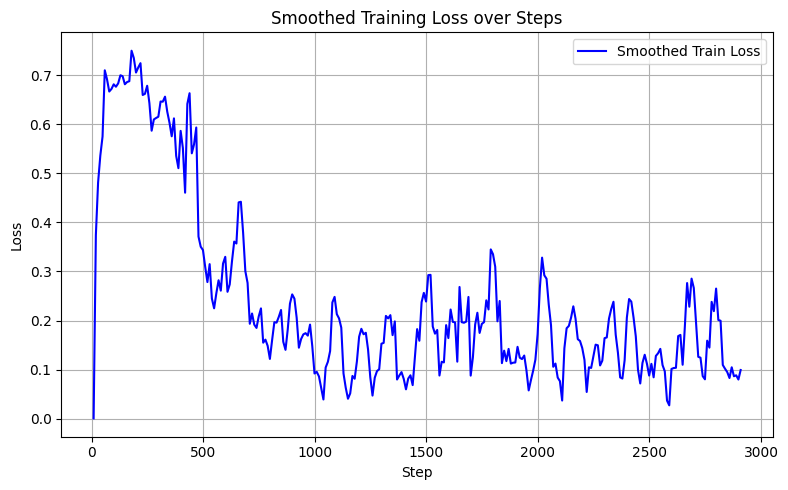

In [107]:
import matplotlib.pyplot as plt

# Load CSV log file
metrics = pd.read_csv("/kaggle/working/logs/my-model/version_1/metrics.csv")

# Drop rows without train_loss
metrics = metrics.dropna(subset=["train_loss"])

# Apply rolling average for smoothing
metrics["smoothed_train_loss"] = metrics["train_loss"].rolling(window=5, min_periods=1).mean()


# Plot
plt.figure(figsize=(8, 5))
plt.plot(metrics["step"], metrics["smoothed_train_loss"], label="Smoothed Train Loss", color="blue")

plt.title("Smoothed Training Loss over Steps")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()